In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv',nrows = 1000000)

C:\Users\Rutvik\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.to_csv('NY_1000000.csv')

In [4]:
df.shape

(1000000, 35)

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

CMPLNT_NUM            0.0000
CMPLNT_FR_DT          0.0031
CMPLNT_FR_TM          0.0000
CMPLNT_TO_DT         18.0641
CMPLNT_TO_TM         18.0177
ADDR_PCT_CD           0.0281
RPT_DT                0.0000
KY_CD                 0.0000
OFNS_DESC             0.1465
PD_CD                 0.1420
PD_DESC               0.1420
CRM_ATPT_CPTD_CD      0.0001
LAW_CAT_CD            0.0000
BORO_NM               0.1475
LOC_OF_OCCUR_DESC    20.0150
PREM_TYP_DESC         0.5187
JURIS_DESC            0.0000
JURISDICTION_CODE     0.1420
PARKS_NM             99.3110
HADEVELOPT           95.2591
HOUSING_PSA          92.6795
X_COORD_CD            0.5366
Y_COORD_CD            0.5366
SUSP_AGE_GROUP       44.3147
SUSP_RACE            34.5941
SUSP_SEX             34.6254
TRANSIT_DISTRICT     97.5694
Latitude              0.5366
Longitude             0.5366
Lat_Lon               0.5366
PATROL_BORO           0.1494
STATION_NAME         97.5694
VIC_AGE_GROUP        11.4204
VIC_RACE              0.0008
VIC_SEX       

In [6]:
# dropping rows with high missing values
df = df.drop(columns = {'CMPLNT_TO_DT' , 'CMPLNT_TO_TM' , 'PD_CD' , 'PD_DESC' , 'JURISDICTION_CODE' , 'PARKS_NM' , 'HADEVELOPT' , 'HOUSING_PSA' , 'TRANSIT_DISTRICT' , 'PATROL_BORO' , 'STATION_NAME'})
df.shape

(1000000, 24)

In [7]:
df2 = df.copy()
def eliminate_nonsense_dates(x):
    if x :
        if x[2] > '2019':
            x = None
        elif x[2] < '2006':
            x = None
        else:
            aa= '/'.join(x)
            return (aa)
df2.dropna(subset=['CMPLNT_FR_DT'], inplace=True) #drop empty dates
df2['CMPLNT_FR_DT'] = df2['CMPLNT_FR_DT'].str.split("/") #create a list for each value
df2['CMPLNT_FR_DT'] = df2['CMPLNT_FR_DT'].apply(lambda x: eliminate_nonsense_dates(x))

In [8]:
df2.dropna(subset = ['CMPLNT_FR_DT'], axis = 0, how = 'any', inplace = True)
df2.isnull().sum()

CMPLNT_NUM                0
CMPLNT_FR_DT              0
CMPLNT_FR_TM              0
ADDR_PCT_CD             261
RPT_DT                    0
KY_CD                     0
OFNS_DESC              1463
CRM_ATPT_CPTD_CD          1
LAW_CAT_CD                0
BORO_NM                1417
LOC_OF_OCCUR_DESC    200072
PREM_TYP_DESC          5119
JURIS_DESC                0
X_COORD_CD             5270
Y_COORD_CD             5270
SUSP_AGE_GROUP       442751
SUSP_RACE            345650
SUSP_SEX             345959
Latitude               5270
Longitude              5270
Lat_Lon                5270
VIC_AGE_GROUP        114165
VIC_RACE                  8
VIC_SEX                   8
dtype: int64

In [9]:
# fill NaN with UNKNOWN in few columns
df2 = df2.fillna({"LOC_OF_OCCUR_DESC": "UNKNOWN", "BORO_NM": "UNKNOWN" , "PREM_TYP_DESC" : "UNKNOWN" , "SUSP_AGE_GROUP" : "UNKNOWN" , "SUSP_RACE" : "UNKNOWN" , "SUSP_SEX" : "UNKNOWN" , "VIC_AGE_GROUP" : "UNKNOWN" , "VIC_RACE": "UNKNOWN" , "VIC_SEX" : "UNKNOWN"})


In [10]:

df2 = df2.drop(columns = {'ADDR_PCT_CD' ,'KY_CD','RPT_DT','X_COORD_CD', 'Y_COORD_CD', 
              'Latitude', 'Longitude', 'Lat_Lon', 'LOC_OF_OCCUR_DESC'})

In [11]:
# Drop all the records with Nan values as their percentage is negligible
df2.dropna(inplace = True)
percent_missing = df2.isnull().sum()
percent_missing

CMPLNT_NUM          0
CMPLNT_FR_DT        0
CMPLNT_FR_TM        0
OFNS_DESC           0
CRM_ATPT_CPTD_CD    0
LAW_CAT_CD          0
BORO_NM             0
PREM_TYP_DESC       0
JURIS_DESC          0
SUSP_AGE_GROUP      0
SUSP_RACE           0
SUSP_SEX            0
VIC_AGE_GROUP       0
VIC_RACE            0
VIC_SEX             0
dtype: int64

In [12]:
age_groups = df2['SUSP_AGE_GROUP'].unique()
df2.shape

(997550, 15)

In [13]:
age_groups

array(['25-44', 'UNKNOWN', '45-64', '<18', '18-24', '65+', '-72', '-968',
       '935', '-969', '2016', '929', '-1', '940', '1019', '2019', '-973',
       '924', '-80', '947', '-966', '-64', '930', '-964', '1016', '-49',
       '2017', '966', '-42', '923', '1014', '-965', '327'], dtype=object)

In [14]:
gender = df2['SUSP_SEX'].unique()
gender

array(['M', 'UNKNOWN', 'U', 'F'], dtype=object)

In [15]:
race = df2['SUSP_RACE'].unique()
race

array(['BLACK', 'UNKNOWN', 'BLACK HISPANIC', 'WHITE', 'WHITE HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE',
       'OTHER'], dtype=object)

In [16]:

df3.unique()

NameError: name 'df3' is not defined

In [ ]:
for i in df3.columns:
    print(i)
    print(df2[i].unique())


In [17]:
val = ['25-44','45-64','<18','18-24','65+']
df3 = df2.copy()

df3 = df3[df3['SUSP_AGE_GROUP'].isin(val)]

In [18]:
newdf = df3[df3['SUSP_AGE_GROUP'].isin(['25-44','45-64','<18','18-24','65+'])]

In [19]:
newdf['SUSP_AGE_GROUP']

0         25-44
6         25-44
10        25-44
11        25-44
12        45-64
          ...  
999981    25-44
999983    25-44
999995      <18
999996    18-24
999998    25-44
Name: SUSP_AGE_GROUP, Length: 370921, dtype: object

In [20]:
for i in df3['SUSP_AGE_GROUP']:
    if i in val:
        pass
    else:
        df3 = df3.drop(i)

In [21]:
df4 = df3.copy()
def eliminate_nonsense_dates(x):
    if x :
        if x[2] > '2019':
            x = None
        elif x[2] < '2006':
            x = None
        else:
            aa= '/'.join(x)
            return (aa)

df4['CMPLNT_FR_DT'] = df4['CMPLNT_FR_DT'].str.split("/") 
df4['CMPLNT_FR_DT'] = df4['CMPLNT_FR_DT'].apply(lambda x: eliminate_nonsense_dates(x))

In [22]:
for i in df4.columns:
    print(i)
    print(df4[i].unique())

CMPLNT_NUM
[700381962 593660503 889259677 ... 740142093 787041474 112805704]
CMPLNT_FR_DT
['05/28/2015' '02/20/2012' '09/28/2012' ... '09/17/2007' '05/05/2010'
 '09/05/2010']
CMPLNT_FR_TM
['15:00:00' '01:30:00' '09:30:00' ... '07:57:00' '05:19:00' '06:19:00']
OFNS_DESC
['HARRASSMENT 2' 'ASSAULT 3 & RELATED OFFENSES' 'PETIT LARCENY'
 'DANGEROUS DRUGS' 'INTOXICATED & IMPAIRED DRIVING' 'FELONY ASSAULT'
 'OFF. AGNST PUB ORD SENSBLTY &' 'DANGEROUS WEAPONS'
 'OFFENSES AGAINST PUBLIC ADMINI' 'RAPE' 'ROBBERY' 'GRAND LARCENY'
 'CRIMINAL MISCHIEF & RELATED OF' 'MURDER & NON-NEGL. MANSLAUGHTER'
 'BURGLARY' 'OFFENSES INVOLVING FRAUD' 'UNAUTHORIZED USE OF A VEHICLE'
 'OTHER OFFENSES RELATED TO THEF' 'FRAUDS' 'CRIMINAL TRESPASS'
 'VEHICLE AND TRAFFIC LAWS' 'SEX CRIMES' 'FORGERY'
 'MISCELLANEOUS PENAL LAW' 'ADMINISTRATIVE CODE'
 'POSSESSION OF STOLEN PROPERTY' 'NYS LAWS-UNCLASSIFIED FELONY' 'ARSON'
 'OFFENSES AGAINST THE PERSON' "BURGLAR'S TOOLS" 'FRAUDULENT ACCOSTING'
 'THEFT OF SERVICES' 'OTHER STA

In [23]:
from datetime import datetime

dates =[]
df4['CMPLNT_FR_DT'] = pd.to_datetime(df4['CMPLNT_FR_DT'])
df4['year'] = pd. DatetimeIndex(df4['CMPLNT_FR_DT']).year
df4.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year
0,700381962,2015-05-28,15:00:00,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,25-44,BLACK,M,25-44,WHITE HISPANIC,F,2015
6,593660503,2012-02-20,01:30:00,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,MANHATTAN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,25-44,BLACK,M,25-44,BLACK,F,2012
10,889259677,2012-09-28,09:30:00,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,RESIDENCE-HOUSE,N.Y. POLICE DEPT,25-44,BLACK HISPANIC,M,18-24,BLACK HISPANIC,F,2012
11,602484492,2017-03-26,12:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,CHAIN STORE,N.Y. POLICE DEPT,25-44,WHITE,F,UNKNOWN,UNKNOWN,D,2017
12,331617213,2016-10-13,16:55:00,DANGEROUS DRUGS,COMPLETED,FELONY,MANHATTAN,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,45-64,BLACK,M,UNKNOWN,UNKNOWN,E,2016


In [24]:
df4['year']

0         2015
6         2012
10        2012
11        2017
12        2016
          ... 
999981    2017
999983    2017
999995    2015
999996    2016
999998    2015
Name: year, Length: 370921, dtype: int64

<AxesSubplot:xlabel='year'>

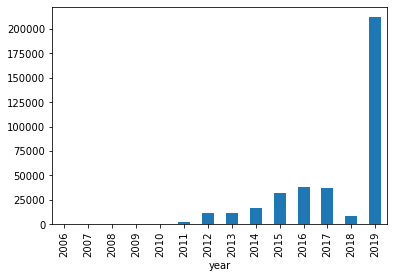

In [25]:
df4.groupby(['year'])['OFNS_DESC'].count().plot(kind='bar')

In [26]:
data = df4['BORO_NM']
dict_boro ={}
for i in data:
    if i not in dict_boro:
        dict_boro[i]= 1
    else:
         dict_boro[i]+= 1
print(dict_boro)

{'BRONX': 89885, 'MANHATTAN': 84837, 'BROOKLYN': 105018, 'STATEN ISLAND': 16973, 'QUEENS': 73328, 'UNKNOWN': 880}


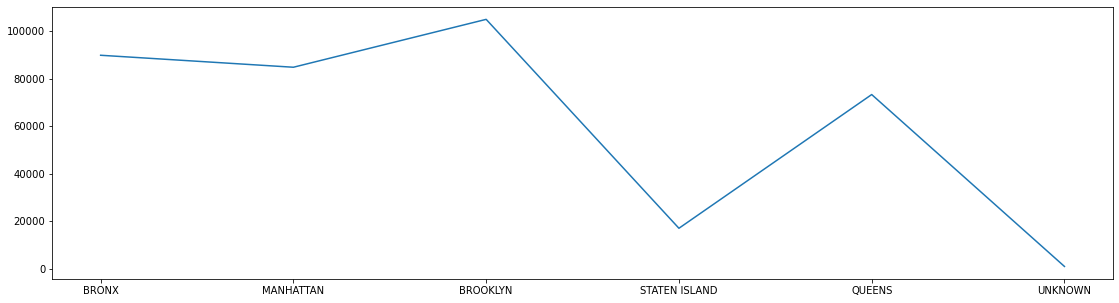

In [27]:
plt.figure(figsize=(19,5))
mylist= dict_boro.values()
mylist = list(mylist)
plt.plot(dict_boro.keys(),dict_boro.values())


In [28]:
include = df4[df4.year == 2019]
df4.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year
0,700381962,2015-05-28,15:00:00,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,25-44,BLACK,M,25-44,WHITE HISPANIC,F,2015
6,593660503,2012-02-20,01:30:00,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,MANHATTAN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,25-44,BLACK,M,25-44,BLACK,F,2012
10,889259677,2012-09-28,09:30:00,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,RESIDENCE-HOUSE,N.Y. POLICE DEPT,25-44,BLACK HISPANIC,M,18-24,BLACK HISPANIC,F,2012
11,602484492,2017-03-26,12:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,CHAIN STORE,N.Y. POLICE DEPT,25-44,WHITE,F,UNKNOWN,UNKNOWN,D,2017
12,331617213,2016-10-13,16:55:00,DANGEROUS DRUGS,COMPLETED,FELONY,MANHATTAN,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,45-64,BLACK,M,UNKNOWN,UNKNOWN,E,2016


<AxesSubplot:xlabel='LAW_CAT_CD'>

<Figure size 1512x360 with 0 Axes>

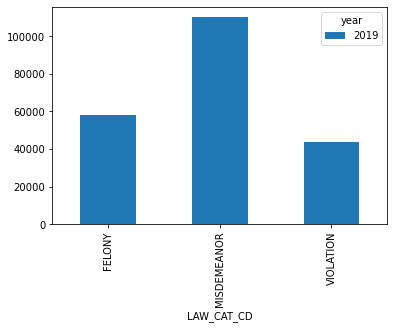

In [29]:
vis0 = df4.groupby("SUSP_SEX")["BORO_NM"].count()
vis0
plt.figure(figsize=(21,5))
include.groupby('year').LAW_CAT_CD.value_counts().unstack(0).plot.bar()


In [30]:
df4.CMPLNT_FR_DT.dt.month

0          5
6          2
10         9
11         3
12        10
          ..
999981     5
999983     4
999995    12
999996     2
999998     5
Name: CMPLNT_FR_DT, Length: 370921, dtype: int64

<AxesSubplot:xlabel='LAW_CAT_CD'>

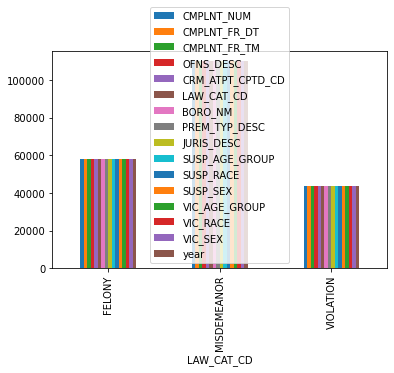

In [31]:
include.groupby(df.LAW_CAT_CD).count().plot.bar()

In [49]:
dfMonth = df4.CMPLNT_FR_DT.dt.month
dfMonth

0          5
6          2
10         9
11         3
12        10
          ..
999981     5
999983     4
999995    12
999996     2
999998     5
Name: CMPLNT_FR_DT, Length: 370921, dtype: int64

In [46]:
vis1 = df4.groupby(['CMPLNT_FR_DT','LAW_CAT_CD']).sum()
df4.to_csv('NY_300k_clean.csv')

In [44]:
vis1.head

<bound method NDFrame.head of                           CMPLNT_NUM  CMPLNT_FR_TM  OFNS_DESC  \
CMPLNT_FR_DT LAW_CAT_CD                                         
2006-01-01   FELONY                8             8          8   
             MISDEMEANOR           7             7          7   
2006-01-02   FELONY                1             1          1   
             VIOLATION             1             1          1   
2006-01-08   VIOLATION             1             1          1   
...                              ...           ...        ...   
2019-12-30   MISDEMEANOR         210           210        210   
             VIOLATION            92            92         92   
2019-12-31   FELONY               87            87         87   
             MISDEMEANOR         165           165        165   
             VIOLATION            77            77         77   

                          CRM_ATPT_CPTD_CD  BORO_NM  PREM_TYP_DESC  \
CMPLNT_FR_DT LAW_CAT_CD                               

In [ ]:
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')